# PROBLEM STATEMENT


<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/1/14/Amazon_Echo_Dot_%28black%29_on_a_wood_surface.jpg"
alt="Fashion MNIST sprite"  length = "1500" width="1500">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Amazon Alexa Reviews Classification [Source: https://en.wikipedia.org/wiki/Amazon_Echo]
  </td></tr>
</table>


- Dataset consists of 3000 Amazon customer reviews, star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots.
- The objective is to discover insights into consumer reviews and perfrom sentiment analysis on the data.
- Dataset: www.kaggle.com/sid321axn/amazon-alexa-reviews
---








# STEP #0: IMPORT LIBRARIES

In [1]:
!pip install tensorflow-gpu==2.9.2

import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# STEP #1: IMPORT DATASETS

In [2]:
dataset = pd.read_csv('amazon_alexa.tsv', sep='\t')

In [3]:
dataset

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [4]:
dataset['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

# STEP #2: VISUALIZE DATASET

In [5]:
positive = dataset[dataset['feedback']==1]

In [6]:
negative = dataset[dataset['feedback']==0]

In [7]:
negative

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


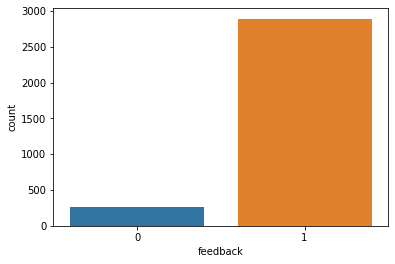

In [8]:
sns.countplot(dataset['feedback'], label = "Count") 

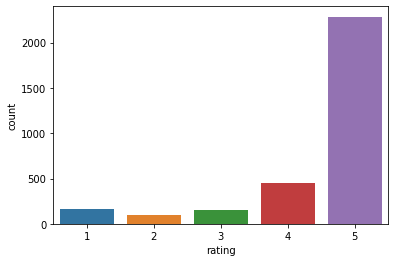

In [9]:
sns.countplot(x='rating', data=dataset)

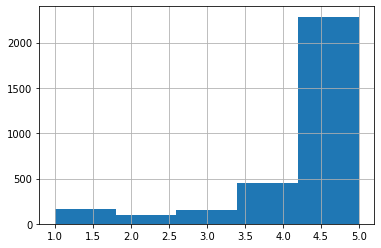

In [10]:
dataset['rating'].hist(bins=5)

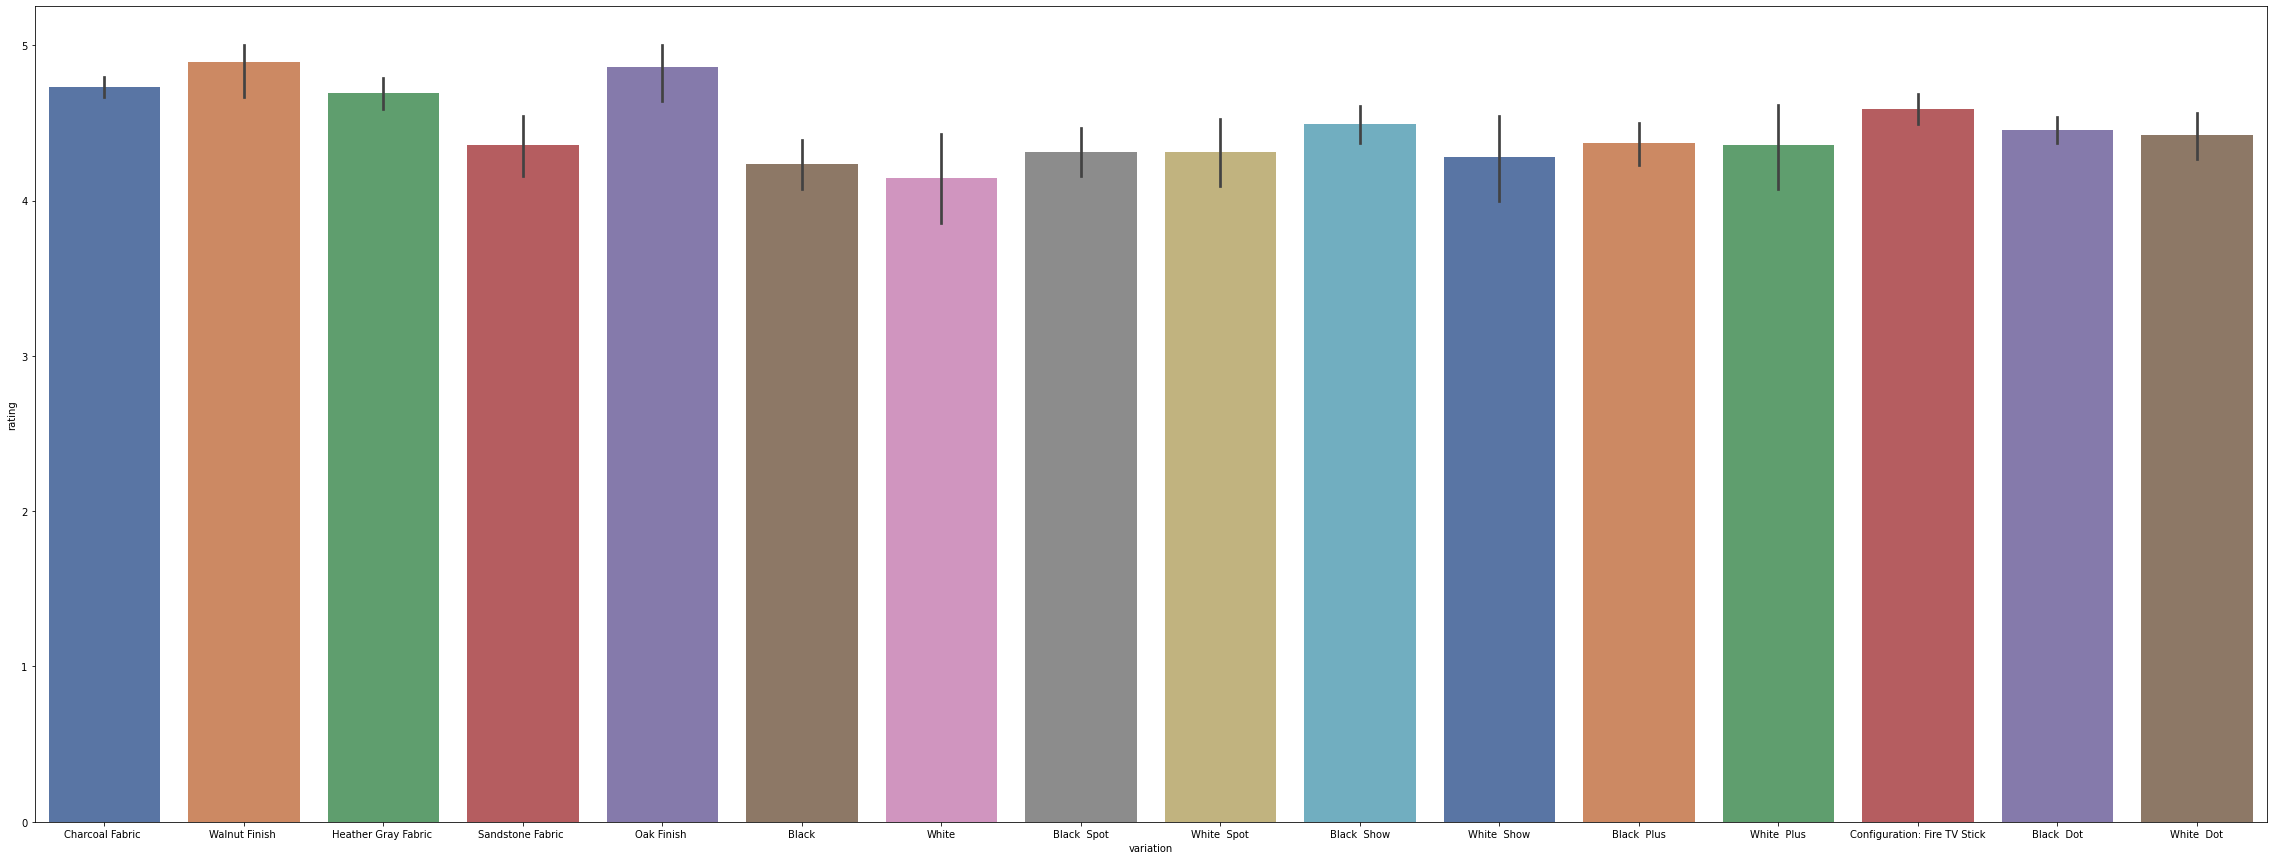

In [11]:
plt.figure(figsize = (40,15))
sns.barplot(x='variation', y='rating', data=dataset, palette='deep')

# STEP #3: CLEAN UP THE DATA 

In [12]:
dataset = dataset.drop(['date', 'rating'],axis=1)

In [13]:
dataset

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [14]:
variation_dummies = pd.get_dummies(dataset['variation'], drop_first=True)

In [15]:
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [16]:
dataset.drop(['variation'], axis=1, inplace=True)

In [17]:
dataset = pd.concat([dataset, variation_dummies], axis=1)

In [18]:
dataset

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Count Vectorizer (Tokenization) Example


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.', 'This document is the second document.', 'And this is the third one.', 'Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [20]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
print(X.toarray())  

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


# Back to our Case Study!

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
dataset_countvectorizer = vectorizer.fit_transform(dataset['verified_reviews'])


In [23]:
dataset_countvectorizer.shape

(3150, 4044)

In [24]:
type(dataset_countvectorizer)

scipy.sparse.csr.csr_matrix

In [25]:
print(vectorizer.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

In [26]:
print(dataset_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
dataset.drop(['verified_reviews'], axis=1, inplace=True)
reviews = pd.DataFrame(dataset_countvectorizer.toarray())


In [28]:
dataset = pd.concat([dataset, reviews], axis=1)

In [29]:
dataset

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
X = dataset.drop(['feedback'],axis=1)


In [31]:
X

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
y = dataset['feedback']

# STEP #4: TRAIN THE MODEL

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [34]:
X_train.shape

(2362, 4059)

In [35]:
X_test.shape

(788, 4059)

In [36]:
y_train.shape

(2362,)

In [37]:
y_test.shape

(788,)

In [38]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(4059, )))

model.add(tf.keras.layers.Dense(units=400, activation='relu'))

model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               1624000   
                                                                 
 dense_1 (Dense)             (None, 400)               160400    
                                                                 
 dense_2 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1,784,801
Trainable params: 1,784,801
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [41]:
pred = model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
74/74 [==============================] - 1s 10ms/step - loss: 0.2808 - accuracy: 0.9145
Epoch 2/100
74/74 [==============================] - 1s 10ms/step - loss: 0.0903 - accuracy: 0.9661
Epoch 3/100
74/74 [==============================] - 1s 9ms/step - loss: 0.0327 - accuracy: 0.9911
Epoch 4/100
74/74 [==============================] - 1s 9ms/step - loss: 0.0182 - accuracy: 0.9932
Epoch 5/100
74/74 [==============================] - 1s 9ms/step - loss: 0.0137 - accuracy: 0.9949
Epoch 6/100
74/74 [==============================] - 1s 9ms/step - loss: 0.0133 - accuracy: 0.9958
Epoch 7/100
74/74 [==============================] - 1s 13ms/step - loss: 0.0135 - accuracy: 0.9936
Epoch 8/100
74/74 [==============================] - 1s 15ms/step - loss: 0.0130 - accuracy: 0.9941
Epoch 9/100
74/74 [==============================] - 1s 14ms/step - loss: 0.0123 - accuracy: 0.9945
Epoch 10/100
74/74 [==============================] - 1s 18ms/step - loss: 0.0119 - accuracy: 0.9945
Epo

# STEP#5: EVALUATING THE MODEL 

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

74/74 [==============================] - 0s 5ms/step


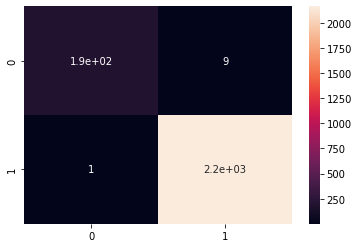

In [43]:
y_pred_train = model.predict(X_train)
y_pred_train

y_pred_train = (y_pred_train > 0.5)

cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True)

25/25 [==============================] - 0s 5ms/step


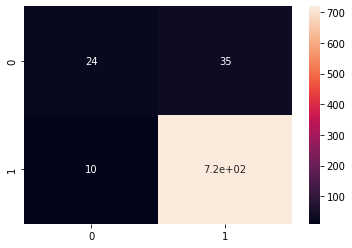

In [44]:
y_pred_test = model.predict(X_test)
y_pred_test

y_pred_test = (y_pred_test > 0.5)

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True)

In [45]:
pred.history.keys()

dict_keys(['loss', 'accuracy'])

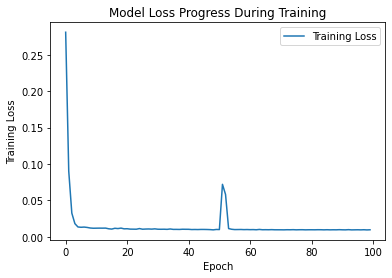

In [46]:
plt.plot(pred.history['loss'])

plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

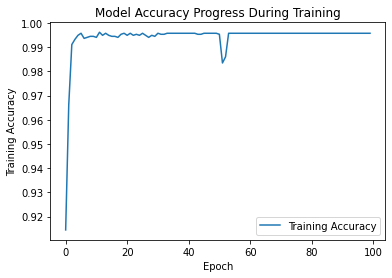

In [47]:
plt.plot(pred.history['accuracy'])

plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])